# **Reading Dataset**

In [1]:
import pandas as pd
df=pd.read_csv('diabetes_prediction_dataset.csv')
display(df.head())
print(df.shape)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


(100000, 9)


# **Gender Distribution**

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

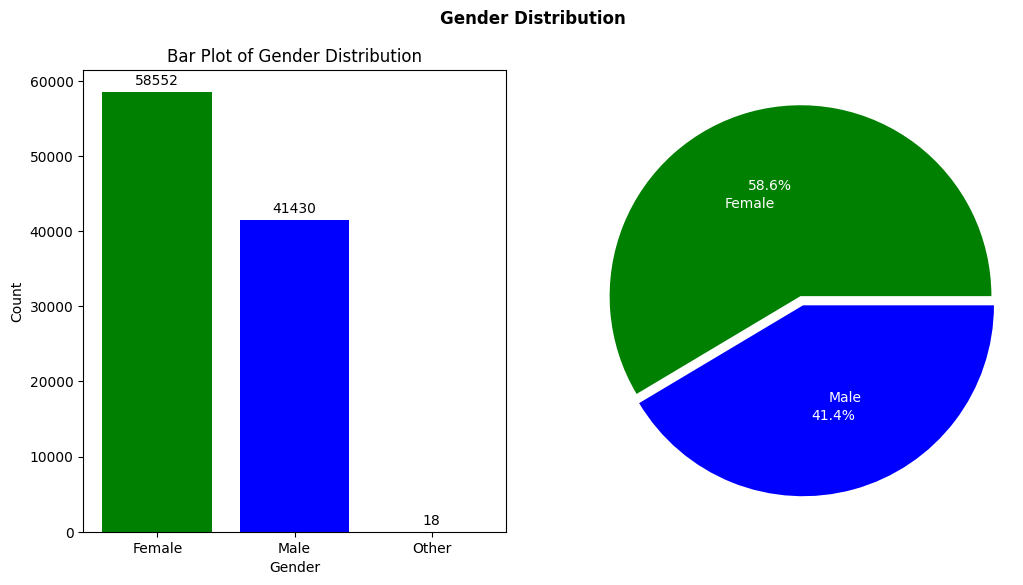

In [2]:
import matplotlib.pyplot as plt

gender_count=df['gender'].value_counts()
display(gender_count)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6))
colors = ['green', 'blue']


# for Bar-Plot
bars = ax1.bar(gender_count.index, gender_count.values, color=colors)
ax1.set_title('Bar Plot of Gender Distribution')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Adding value annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.annotate(f'{yval}', xy=(bar.get_x() + bar.get_width() / 2, yval), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')
#For Pie-Chart
gender_count=gender_count.drop(labels='Other')
explode = (0, 0.05)  
ax2.pie(gender_count,labels=gender_count.index,labeldistance=0.5, autopct="%1.1f%%",colors=colors ,explode=explode, textprops={'color':'white'})
ax2.axis('equal')
plt.suptitle("Gender Distribution",fontweight="bold")
plt.show()

# **Balncing the DF**
there are more female dataset than male ones so they have to be balnced if reaosanble realtion bewtween gender and diabetes has to be derived

In [3]:
# Separate the data by gender
females = df[df['gender'] == 'Female']
males = df[df['gender'] == 'Male']

# Determine the minority class size (number of males)
num_males = len(males)

# Undersample the majority class (females)
females_undersampled = females.sample(n=num_males, random_state=42)

# Combine the balanced data
df = pd.concat([females_undersampled, males])
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
52677,Female,43.0,0,0,current,44.25,6.0,200,0
58353,Female,66.0,0,0,current,18.64,3.5,126,0
73863,Female,37.0,0,0,never,19.31,6.5,80,0
13031,Female,32.0,0,0,not current,27.32,6.1,140,0
84009,Female,49.0,0,0,never,23.58,5.8,200,0


## **Correlation Heatmap**

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_numeric
count,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000
mean,41.814388,0.075477,0.042155,27.300882,5.531752,138.229290,0.086894,0.500000
std,22.628591,0.264161,0.200945,6.572332,1.073015,40.839493,0.281681,0.500003
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,23.720000,4.800000,100.000000,0.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000,0.500000
75%,60.000000,0.000000,0.000000,29.560000,6.200000,159.000000,0.000000,1.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000


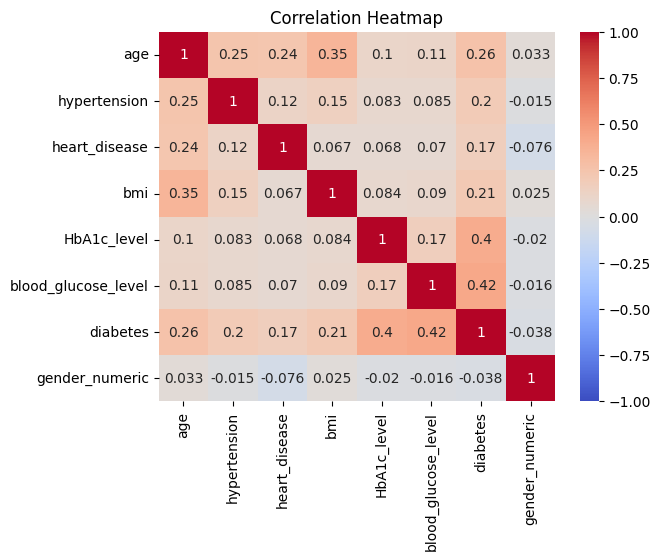

In [4]:
import seaborn as sns

df['gender_numeric'] = df['gender'].map({'Male': 0, 'Female': 1})
display(df.describe())

correlation_matrix = df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes','gender_numeric']].corr()

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title("Correlation Heatmap")
plt.show()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_numeric,combined_score
52677,Female,43.0,0,0,current,44.25,0.454545,0.545455,0,1,1.219512
58353,Female,66.0,0,0,current,18.64,0.000000,0.209091,0,1,0.254989
73863,Female,37.0,0,0,never,19.31,0.545455,0.000000,0,1,0.665188
13031,Female,32.0,0,0,not current,27.32,0.472727,0.272727,0,1,0.909091
84009,Female,49.0,0,0,never,23.58,0.418182,0.545455,0,1,1.175166


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_numeric,combined_score
count,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000,82860.000000
mean,41.814388,0.075477,0.042155,27.300882,0.369410,0.264679,0.086894,0.500000,0.773278
std,22.628591,0.264161,0.200945,6.572332,0.195094,0.185634,0.281681,0.500003,0.354761
min,0.080000,0.000000,0.000000,10.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,23.720000,0.236364,0.090909,0.000000,0.000000,0.548780
50%,43.000000,0.000000,0.000000,27.320000,0.418182,0.272727,0.000000,0.500000,0.764967
75%,60.000000,0.000000,0.000000,29.560000,0.490909,0.359091,0.000000,1.000000,0.986696
max,80.000000,1.000000,1.000000,95.690000,1.000000,1.000000,1.000000,1.000000,2.439024


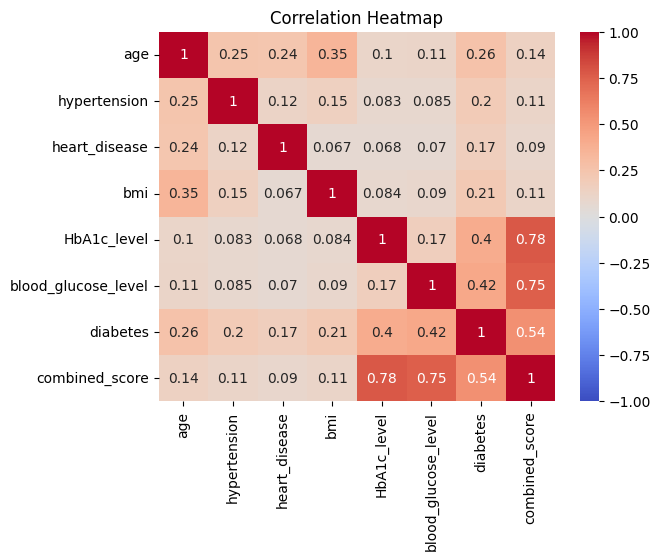

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
def scale(df,list_to_scale):
    for e in list_to_scale:
        df[e]=scaler.fit_transform(df[[e]])

scale(df,['HbA1c_level','blood_glucose_level'])
combined_score=lambda x : (x['HbA1c_level']+x['blood_glucose_level'])*(1/0.82)

df['combined_score']=df.apply(combined_score,axis=1)
display(df.head())
import seaborn as sns
display(df.describe())
correlation_matrix = df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes','combined_score']].corr()

sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Model Selction
Checking different model accuracies to slect ideal one

## **Linear Regression**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=df[['combined_score']]
y=df['diabetes']    
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8,random_state=42)

pipeline_lr=Pipeline([
    ('linearReg',LogisticRegression())
])


pipeline_lr.fit(X_train,y_train)

y_pred=pipeline_lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"LR Accuracy of Model is : {accuracy}")





LR Accuracy of Model is : 0.9522538015930485


## **SVM**

In [7]:
pipeline_svm = Pipeline([
    ('svm', SVC())  # Step: Support Vector Classifier
])


pipeline_svm.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

SVM Accuracy: 0.96


## **Decision Tree**

In [12]:

from sklearn.tree import DecisionTreeClassifier

X=df[['combined_score']]
y=df['diabetes']    

# Pipeline with Decision Tree Classifier
pipeline_dt = Pipeline([
    ('decision_tree', DecisionTreeClassifier())
])

# Fit the Decision Tree pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Predict on the test data and evaluate
y_pred_dt = pipeline_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")


Decision Tree Accuracy: 0.97


# **Saving Models for deployement**

In [9]:
import joblib

# Assuming pipeline_dt is your trained Decision Tree pipeline
# Save the model to a file
joblib.dump(pipeline_lr, 'diabetes_linear_regression_model.pkl')

print("Model saved successfully!")


Model saved successfully!


In [10]:
import joblib

# Assuming pipeline_dt is your trained Decision Tree pipeline
# Save the model to a file
joblib.dump(pipeline_dt, 'diabetes_decision_tree_model.pkl')

print("Model saved successfully!")


Model saved successfully!


# **Deploying Decision tree with a streamlit app**
Decision tree has proved to be fastest and most efficient model and has been deployed through deployment.py